In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

In [5]:
data = pd.read_csv('heartdis.xls')

In [6]:
print(data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [9]:
data.shape

(1025, 14)

In [59]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0




    age
    sex
    chest pain type (4 values)
    Value 0: typical angina
    Value 1: atypical angina
    Value 2: non-anginal pain
    Value 3: asymptomatic
    trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    chol: serum cholestoral in mg/dl
    fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg: resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    thalach: maximum heart rate achieved
    exang: exercise induced angina (1 = yes; 0 = no)
    oldpeak = ST depression induced by exercise relative to rest
    slope: the slope of the peak exercise ST segment
    Value 1: upsloping
    Value 2: flat
    Value 3: downsloping
    ca: number of major vessels (0-3) colored by flourosopy
    thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    target : 0=less chance of heart attack, 1=more chance of heart attack


    

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
data.duplicated().sum()

723

In [14]:
data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [15]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Correlation

<Axes: >

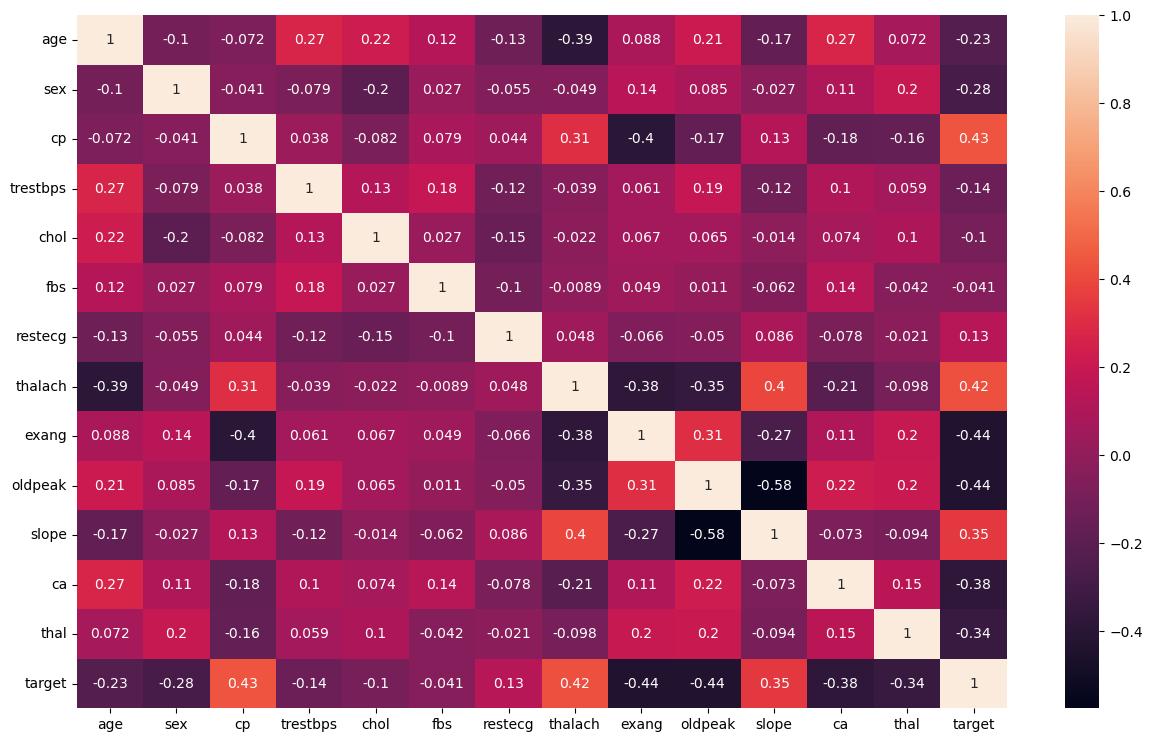

In [18]:
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(),annot = True)

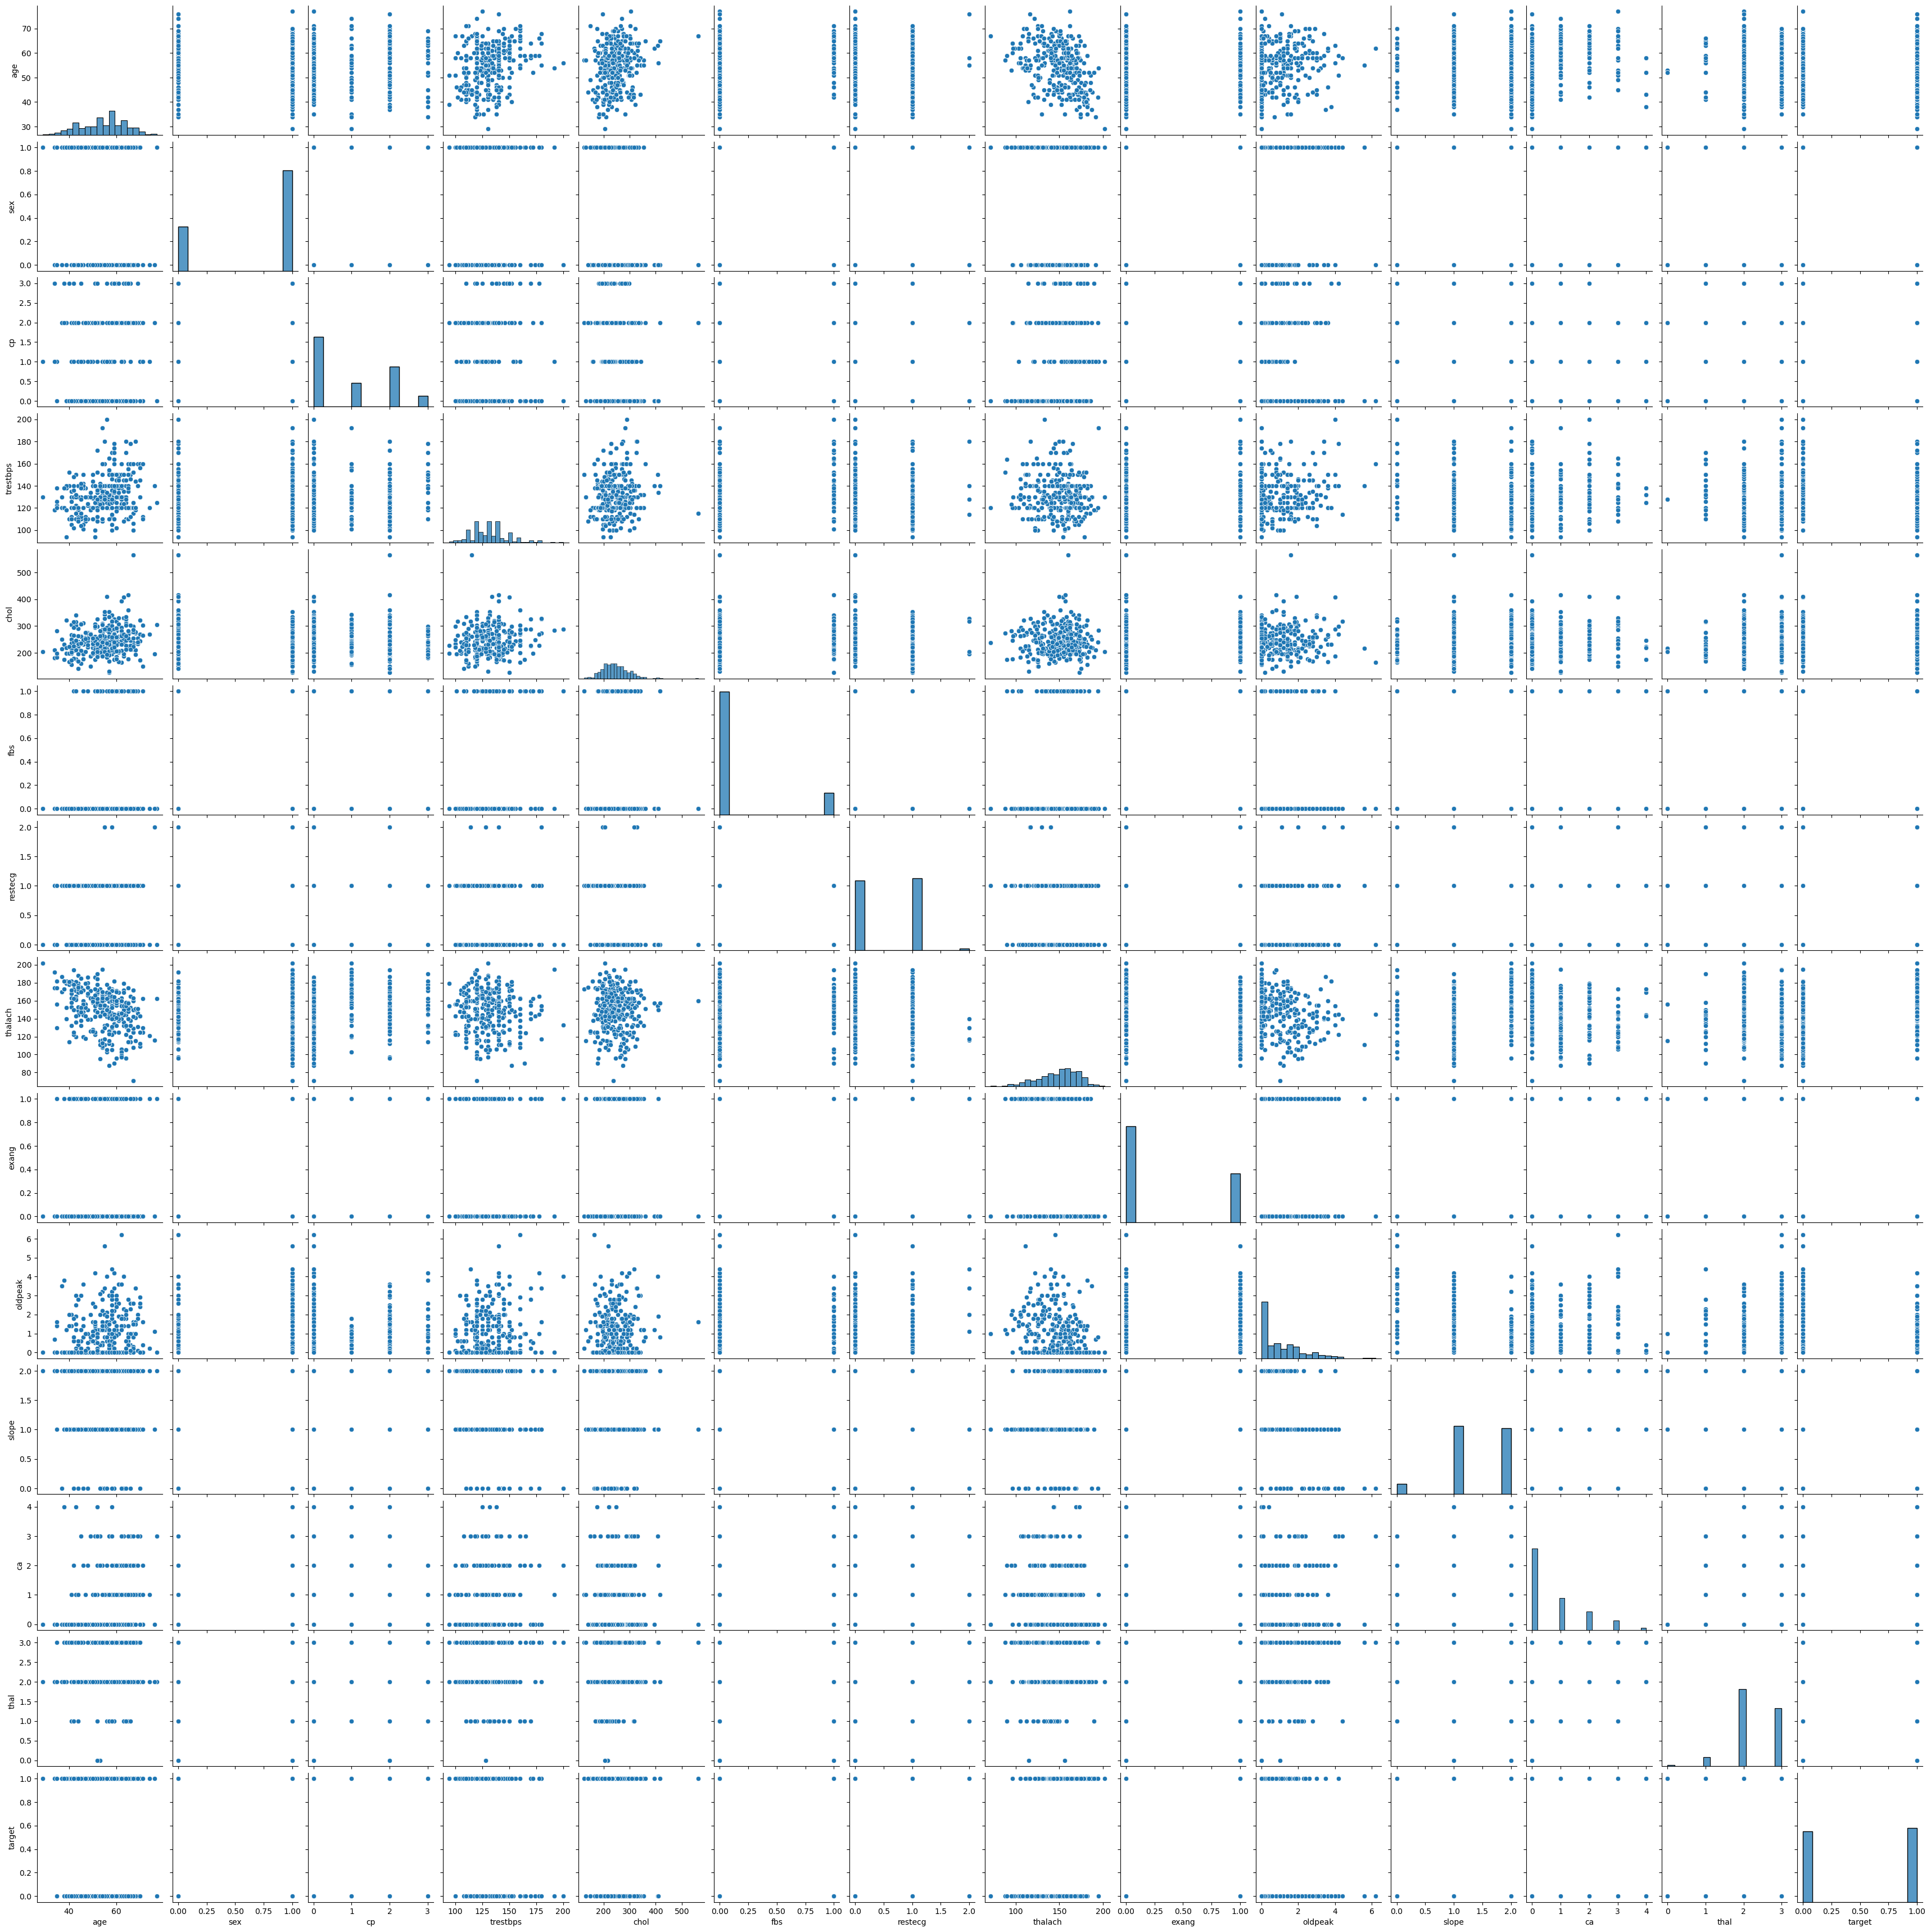

In [33]:
sns.pairplot(data)

In [19]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Finding Number of People with heart disease

C:\Users\alpha\AppData\Local\Temp\ipykernel_15808\464302139.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'],color ='orange')


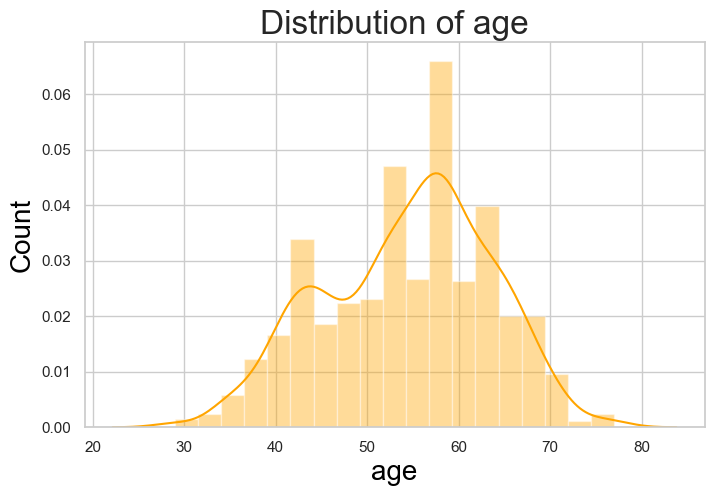

In [56]:
#Distribution of income

plt.figure(figsize=(8,5))
sns.set(style="whitegrid")
sns.distplot(data['age'],color ='orange')
plt.title("Distribution of age",fontsize=24)
plt.xlabel("age",fontsize=20,color='black')
plt.ylabel("Count",fontsize=20,color='black')
plt.show()

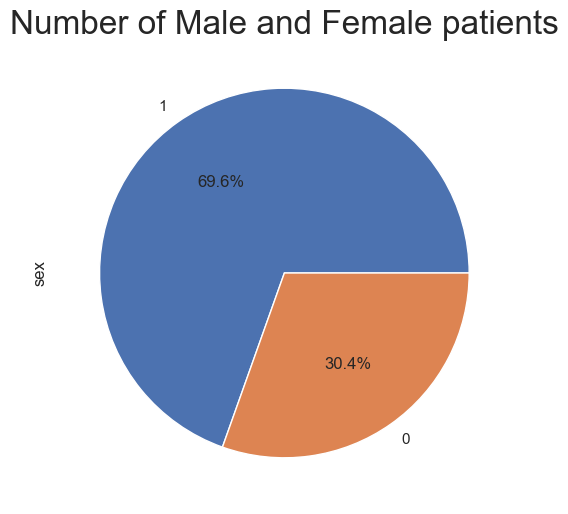

In [58]:
#

plt.figure(figsize=(6,6))
data['sex'].value_counts().plot(kind='pie',autopct='%2.1f%%')
plt.title("Number of Male and Female patients",fontsize=24)
plt.show()

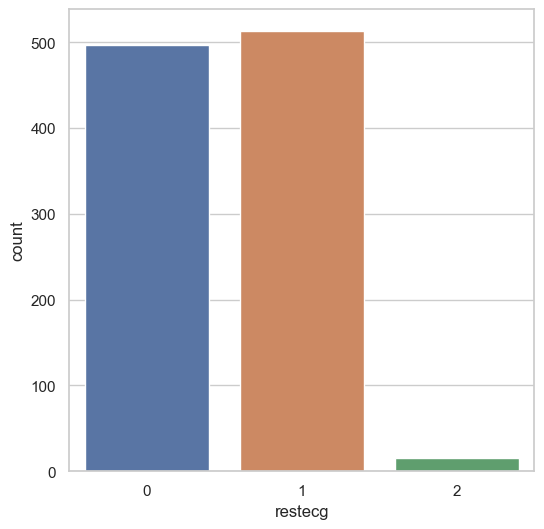

In [62]:
plt.figure(figsize=(6,6))
sns.countplot(x='restecg',data=data)
plt.show()

In [20]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [31]:
x = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['target']

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=101)

In [35]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
522,67,0,2,152,277,0,1,172,0,0.0,2,1,2
48,66,0,2,146,278,0,0,152,0,0.0,1,1,2
567,41,1,2,130,214,0,0,168,0,2.0,1,0,2
146,51,0,2,120,295,0,0,157,0,0.6,2,0,2
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,43,1,0,150,247,0,1,171,0,1.5,2,0,2
838,51,1,3,125,213,0,0,125,1,1.4,2,1,2
337,54,1,2,125,273,0,0,152,0,0.5,0,1,2
523,61,1,0,148,203,0,1,161,0,0.0,2,1,3


In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(X_train, y_train)

LinearRegression()

In [39]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])

In [40]:
coeff_df

,Coefficient
age,-0.000715
sex,-0.210487
cp,0.123906
trestbps,-0.002598
chol,-0.000402
fbs,-0.035413
restecg,0.040672
thalach,0.003145
exang,-0.147982
oldpeak,-0.048323


In [41]:
prediction = lm.predict(X_test)

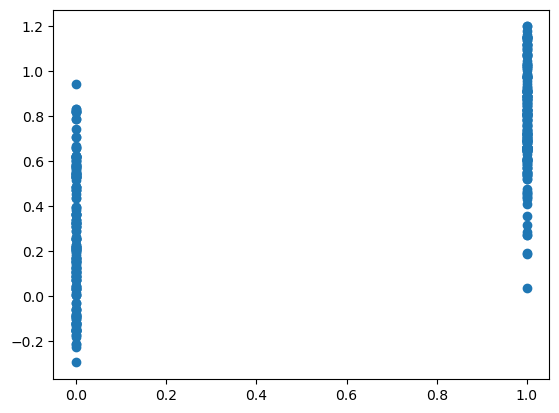

In [42]:
plt.scatter(y_test, prediction)

C:\Users\alpha\AppData\Local\Temp\ipykernel_15808\2213606795.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction), bins=50)


<Axes: xlabel='target', ylabel='Density'>

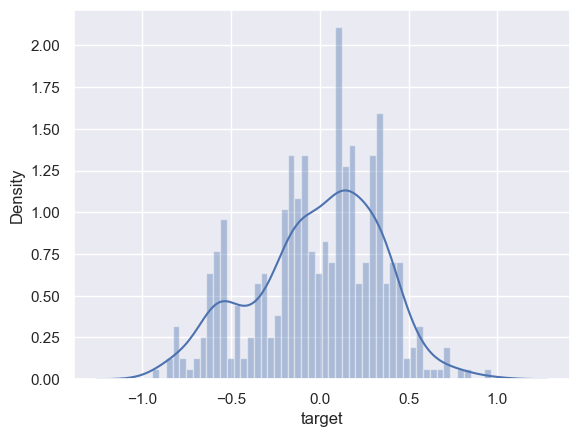

In [52]:
sns.distplot((y_test-prediction), bins=50)